In [1]:
from  fiona import listlayers
import os

romaniaMaps=os.path.join('maps','romaniaMaps_3844_all.gpkg')

#layers in maps
listlayers(romaniaMaps)

['country',
 'cities',
 'rivers',
 'airports',
 'border',
 'states',
 'municipalities']

In [2]:
import os
import geopandas as gpd

states=gpd.read_file(romaniaMaps,layer='states')
municipalities=gpd.read_file(romaniaMaps,layer='municipalities')
airports=gpd.read_file(romaniaMaps,layer='airports')
rivers=gpd.read_file(romaniaMaps,layer='rivers')
border=gpd.read_file(romaniaMaps,layer='border')

In [3]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)
#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)

In [5]:

seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# no esta proyectado

# subset:
seaports_ro=seaports[seaports['Country Code']=='Romania'].copy()

# reset indexes
seaports_ro.reset_index(drop=True, inplace=True)

# reprojecting
seaports_ro_3844=seaports_ro.to_crs(3844) # proyectado

In [6]:
print(airports.columns)

Index(['name', 'kind', 'latitude_deg', 'longitude_deg', 'elevation_ft',
       'region_name', 'municipality', 'geometry'],
      dtype='object')


In [7]:
#PRIMERO SE MOSTRARA: MEDIUM AIRPORTS


<Axes: >

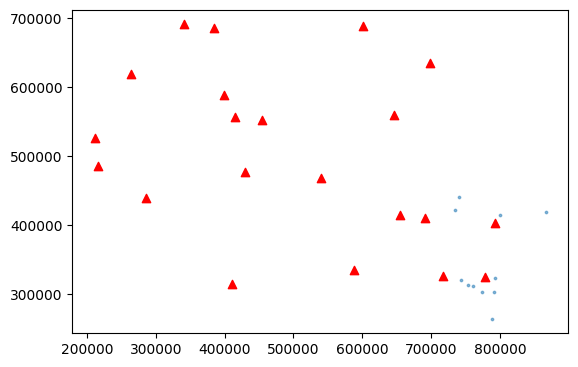

In [8]:
# subsetting
mediumAirports=airports[airports['kind']=='medium_airport'] 
mediumAirports.reset_index(drop=True, inplace=True)

#plotting
base=mediumAirports.plot(color='red',marker="^")
seaports_ro_3844.plot(ax=base,alpha=0.5,markersize=3)

In [9]:
#Matriz de distancias

seaports_ro_3844.set_index('portName').geometry.apply\
(lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Arad International Airport,Bacău Airport,Boboc Air Base,Brașov-Ghimbav International Airport (U.C.),Băneasa International Airport,Caransebeş Airport,Cluj-Napoca International Airport,Craiova Airport,Câmpia Turzii Air Base,Feteşti Air Base,...,Iaşi Airport,Maramureș International Airport,Mihail Kogălniceanu International Airport,Oradea International Airport,Satu Mare Airport,Sibiu International Airport,Suceava Stefan cel Mare Airport,Timişoara Traian Vuia Airport,Transilvania Târgu Mureş International Airport,Tulcea Danube Delta Airport
portName,,,,,,,,,,,,,,,,,,,,,
Basarabi,606.096978,287.700776,164.050782,286.377910,189.673320,508.317041,471.491654,363.407100,440.809270,61.750902,...,340.926698,546.795539,22.175808,600.167433,582.471244,386.787050,423.252058,588.366122,405.839423,102.055089
Braila,533.151323,164.076418,78.987986,198.904146,170.241779,449.404357,373.835817,340.148931,347.118075,97.468072,...,216.390227,438.207195,106.467385,509.388895,476.886921,309.791295,298.432200,522.631152,308.491874,61.151743
Cernavoda,570.597640,259.076912,129.712414,250.836100,156.290148,473.541382,436.118465,331.924059,405.253801,26.599192,...,318.216831,512.422964,35.108028,564.422579,547.663711,351.017268,395.258681,553.235643,370.544235,96.662999
Constanta,621.948260,295.154658,176.552979,300.271950,206.647678,524.819077,484.929819,380.697336,454.643408,77.881181,...,344.468172,558.751500,25.285878,614.562761,594.970936,401.993423,429.937795,604.619773,419.167050,99.720637
Danube-Black Sea Canal,583.318184,269.746416,142.293072,263.781964,167.932510,485.893950,449.031878,342.799627,418.203950,39.016683,...,326.821010,525.068246,26.556022,577.391045,560.434367,363.917173,405.773537,565.762859,383.438393,97.982834
Galati,536.792425,152.826360,89.439162,202.438434,186.385498,456.168010,372.348735,353.195143,346.931749,117.289480,...,199.264232,432.961679,121.501629,509.066181,472.499631,314.058896,285.125297,527.754294,307.608187,63.288734
Mangalia,633.765157,328.183075,201.213469,320.567824,212.669615,532.903782,506.141529,380.230425,474.712797,93.819491,...,381.400191,583.740579,61.123321,632.548948,618.608568,417.267366,463.870223,614.186799,440.805412,138.892321
Medgidia,590.157700,273.939281,148.150064,270.169026,174.809075,492.800657,455.323528,349.535096,424.599644,45.898874,...,329.587715,530.938278,21.646400,583.938599,566.471110,370.638674,409.809275,572.651757,389.690297,97.052782
Midia,615.289429,277.777522,164.701265,289.940120,204.949906,520.285054,473.545549,381.070969,443.926344,75.092138,...,324.974697,545.268402,14.291052,604.683036,582.155532,393.976498,411.912517,599.164195,407.692013,79.298437


In [10]:
#SE GUARDAN LOS VALORES
distanceMatrixKM_sea_air= seaports_ro_3844.set_index('portName').geometry.apply\
                          (lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [11]:
#SE VE EL MINIMO, MEDIA Y MAXIMO
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)

# see some
SomeStats.head(10)

,mean,min,max
portName,,,
Basarabi,357.831225,22.175808,606.096978
Braila,287.892936,44.575856,533.151323
Cernavoda,328.024806,26.599192,570.597640
Constanta,369.699417,25.285878,621.948260
Danube-Black Sea Canal,338.612406,26.556022,583.318184
Galati,290.743546,58.670709,536.792425
Mangalia,391.035597,61.123321,633.765157
Medgidia,343.742572,21.646400,590.157700
Midia,359.184757,14.291052,615.289429


In [12]:
#los aeropuertos más cercanos a cada seaport
distanceMatrixKM_sea_air.idxmin(axis=1)

portName
Basarabi                  Mihail Kogălniceanu International Airport
Braila                                               Ianca Air Base
Cernavoda                                          Feteşti Air Base
Constanta                 Mihail Kogălniceanu International Airport
Danube-Black Sea Canal    Mihail Kogălniceanu International Airport
Galati                                               Ianca Air Base
Mangalia                  Mihail Kogălniceanu International Airport
Medgidia                  Mihail Kogălniceanu International Airport
Midia                     Mihail Kogălniceanu International Airport
Sulina                                  Tulcea Danube Delta Airport
Tulcea                                  Tulcea Danube Delta Airport
dtype: object

In [13]:
#el seaport más cercano a cada aeropuerto
distanceMatrixKM_sea_air.idxmin(axis=0)

name
Arad International Airport                           Braila
Bacău Airport                                        Galati
Boboc Air Base                                       Braila
Brașov-Ghimbav International Airport (U.C.)          Braila
Băneasa International Airport                     Cernavoda
Caransebeş Airport                                   Braila
Cluj-Napoca International Airport                    Galati
Craiova Airport                                   Cernavoda
Câmpia Turzii Air Base                               Galati
Feteşti Air Base                                  Cernavoda
Ianca Air Base                                       Braila
Iaşi Airport                                         Galati
Maramureș International Airport                      Galati
Mihail Kogălniceanu International Airport             Midia
Oradea International Airport                         Galati
Satu Mare Airport                                    Galati
Sibiu International Airport        

In [14]:
mins=distanceMatrixKM_sea_air.idxmin(axis=1)
mins

portName
Basarabi                  Mihail Kogălniceanu International Airport
Braila                                               Ianca Air Base
Cernavoda                                          Feteşti Air Base
Constanta                 Mihail Kogălniceanu International Airport
Danube-Black Sea Canal    Mihail Kogălniceanu International Airport
Galati                                               Ianca Air Base
Mangalia                  Mihail Kogălniceanu International Airport
Medgidia                  Mihail Kogălniceanu International Airport
Midia                     Mihail Kogălniceanu International Airport
Sulina                                  Tulcea Danube Delta Airport
Tulcea                                  Tulcea Danube Delta Airport
dtype: object

In [15]:
#Un aereopuerto
matrix1=mediumAirports[mediumAirports.name.str.contains('Mihail Kogălniceanu International Airport')]
matrix1

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
3,Mihail Kogălniceanu International Airport,medium_airport,44.362202,28.4883,353.0,Constanţa County,Constanţa,POINT (778139.192 324052.709)


In [16]:
distanceMatrixKM_sea_air2= matrix1.set_index('name').geometry.apply\
                          (lambda g: seaports_ro_3844.set_index('portName').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_sea_air2

portName,Basarabi,Braila,Cernavoda,Constanta,Danube-Black Sea Canal,Galati,Mangalia,Medgidia,Midia,Sulina,Tulcea
name,,,,,,,,,,,
Mihail Kogălniceanu International Airport,22.175808,106.467385,35.108028,25.285878,26.556022,121.501629,61.123321,21.6464,14.291052,129.271196,93.13553


In [17]:
mins2=distanceMatrixKM_sea_air2.idxmin(axis="columns")
mins2

name
Mihail Kogălniceanu International Airport    Midia
dtype: object

In [18]:
#Ploteo
base=seaports_ro_3844[seaports_ro_3844.portName.str.contains('Basarabi')].explore(color='red', marker_kwds=dict(radius=10))
# Los más cercanos los graficamos de rojo
mediumAirports[mediumAirports.name.str.contains('Mihail Kogălniceanu International Airport')].explore(m=base,color='orange',marker_kwds=dict(radius=10))

In [19]:
#Ejercicio 2

In [20]:
rivers

,NAME,SYSTEM,geometry
0,Danube,None,"MULTILINESTRING ((821455.357 423239.917, 86622..."


In [21]:
#En este pais solo tienen ese principal rio en el mapa

In [22]:
#Matriz de distancias
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
                        (lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
                        sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name,Arad International Airport,Bacău Airport,Boboc Air Base,Brașov-Ghimbav International Airport (U.C.),Băneasa International Airport,Caransebeş Airport,Cluj-Napoca International Airport,Craiova Airport,Câmpia Turzii Air Base,Feteşti Air Base,...,Iaşi Airport,Maramureș International Airport,Mihail Kogălniceanu International Airport,Oradea International Airport,Satu Mare Airport,Sibiu International Airport,Suceava Stefan cel Mare Airport,Timişoara Traian Vuia Airport,Transilvania Târgu Mureş International Airport,Tulcea Danube Delta Airport
NAME,,,,,,,,,,,,,,,,,,,,,
Danube,146.084694,157.74737,89.383507,190.841871,51.932061,77.118653,239.281638,34.765546,216.84451,13.847103,...,198.613213,328.270363,19.506341,240.152834,327.031496,156.826336,288.007424,104.899494,233.621628,27.701358


In [23]:
#La distancia de cada aeropuerto al río
distanceMatrixKM_riv_air.loc['Danube'].sort_values()

name
Feteşti Air Base                                   13.847103
Mihail Kogălniceanu International Airport          19.506341
Tulcea Danube Delta Airport                        27.701358
Craiova Airport                                    34.765546
Băneasa International Airport                      51.932061
Ianca Air Base                                     53.339734
Caransebeş Airport                                 77.118653
Boboc Air Base                                     89.383507
Timişoara Traian Vuia Airport                     104.899494
Arad International Airport                        146.084694
Sibiu International Airport                       156.826336
Bacău Airport                                     157.747370
Brașov-Ghimbav International Airport (U.C.)       190.841871
Iaşi Airport                                      198.613213
Câmpia Turzii Air Base                            216.844510
Transilvania Târgu Mureş International Airport    233.621628
Cluj-Napoca Interna

In [24]:
rio1=rivers[rivers.NAME.str.contains('Danube')]
rio1

,NAME,SYSTEM,geometry
0,Danube,None,"MULTILINESTRING ((821455.357 423239.917, 86622..."


In [25]:
#Matriz del río escogido
distanceMatrixKM_sys_air2= rio1.set_index('NAME').geometry.apply\
                          (lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_sys_air2

name,Arad International Airport,Bacău Airport,Boboc Air Base,Brașov-Ghimbav International Airport (U.C.),Băneasa International Airport,Caransebeş Airport,Cluj-Napoca International Airport,Craiova Airport,Câmpia Turzii Air Base,Feteşti Air Base,...,Iaşi Airport,Maramureș International Airport,Mihail Kogălniceanu International Airport,Oradea International Airport,Satu Mare Airport,Sibiu International Airport,Suceava Stefan cel Mare Airport,Timişoara Traian Vuia Airport,Transilvania Târgu Mureş International Airport,Tulcea Danube Delta Airport
NAME,,,,,,,,,,,,,,,,,,,,,
Danube,146.084694,157.74737,89.383507,190.841871,51.932061,77.118653,239.281638,34.765546,216.84451,13.847103,...,198.613213,328.270363,19.506341,240.152834,327.031496,156.826336,288.007424,104.899494,233.621628,27.701358


In [26]:
mins=distanceMatrixKM_sys_air2.idxmin(axis="columns") # same as axis=1
mins

NAME
Danube    Feteşti Air Base
dtype: object

In [27]:
#el aeropuerto con máximas distancias a este sistema
maxs=distanceMatrixKM_sys_air2.idxmax(axis="columns")
maxs

NAME
Danube    Maramureș International Airport
dtype: object

In [28]:
#Ploteo
base=rio1.explore()
# Los más cercanos los graficamos de rojo
mediumAirports[mediumAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# Los restantes los graficamos de azul
mediumAirports[~mediumAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

In [29]:
#Ejercicio 3

In [30]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry


In [31]:
#El ejercicio no es posible resolverlo con la data del pais Romania, puesto que solo tiene un rio

In [32]:
#Ejercicio 4

In [33]:
#Recordamos la matrix de distancias
distanceMatrixKM_riv_air

name,Arad International Airport,Bacău Airport,Boboc Air Base,Brașov-Ghimbav International Airport (U.C.),Băneasa International Airport,Caransebeş Airport,Cluj-Napoca International Airport,Craiova Airport,Câmpia Turzii Air Base,Feteşti Air Base,...,Iaşi Airport,Maramureș International Airport,Mihail Kogălniceanu International Airport,Oradea International Airport,Satu Mare Airport,Sibiu International Airport,Suceava Stefan cel Mare Airport,Timişoara Traian Vuia Airport,Transilvania Târgu Mureş International Airport,Tulcea Danube Delta Airport
NAME,,,,,,,,,,,,,,,,,,,,,
Danube,146.084694,157.74737,89.383507,190.841871,51.932061,77.118653,239.281638,34.765546,216.84451,13.847103,...,198.613213,328.270363,19.506341,240.152834,327.031496,156.826336,288.007424,104.899494,233.621628,27.701358


In [34]:
medium_airports=airports[airports['kind']=='medium_airport']

In [35]:
# using the previous value
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*1000

In [36]:
# you see all the buffer polygons:
riversAll_buf=rivers.buffer(distance = minMinMts_5)
riversAll_buf

0    POLYGON ((262209.115 279347.156, 260074.455 27...
dtype: geometry

In [37]:
#Solo los aereopuertos medianos
allRiversWithinBuffs=medium_airports.clip(riversAll_buf)
allRiversWithinBuffs

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
8,Craiova Airport,medium_airport,44.318100,23.888599,626.0,Dolj County,Craiova,POINT (411461.077 313756.747)
4,Mihail Kogălniceanu International Airport,medium_airport,44.362202,28.488300,353.0,Constanţa County,Constanţa,POINT (778139.192 324052.709)
34,Feteşti Air Base,medium_airport,44.392300,27.726700,180.0,Ialomiţa County,Feteşti,POINT (717339.678 325059.732)
1,Băneasa International Airport,medium_airport,44.503201,26.102100,297.0,Bucharest (municipality),Bucharest,POINT (587756.538 334312.731)
11,Tulcea Danube Delta Airport,medium_airport,45.062500,28.714300,200.0,Tulcea County,Tulcea,POINT (792554.897 402625.922)
35,Ianca Air Base,medium_airport,45.158699,27.430901,131.0,Brăila County,Ianca,POINT (691206.590 409443.691)


In [40]:
# Ploteo

base=riversAll_buf.explore(color='orange')
allRiversWithinBuffs.explore(m=base, color='blue')